In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Invoice id: Computer generated sales slip invoice identification number

Branch: Branch of supercenter (3 branches are available identified by A, B and C).

City: Location of supercenters

Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

Gender: Gender type of customer

Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

Unit price: Price of each product in $

Quantity: Number of products purchased by customer

Tax: 5% tax fee for customer buying

Total: Total price including tax

Date: Date of purchase (Record available from January 2019 to March 2019)

Time: Purchase time (10am to 9pm)

Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

COGS: Cost of goods sold

Gross margin percentage: Gross margin percentage

Gross income: Gross income

Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)




The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

In [2]:
df=pd.read_csv(r"C:\Users\nevta\Desktop\Datasets\super.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# Data Cleaning

In [4]:
((((df["Unit price"]*df["Quantity"])/100)*5)==df["Tax 5%"]).sum()

638

In [5]:
df["Tax 5%"]=(((df["Unit price"]*df["Quantity"])/100)*5)

In [6]:
((((df["Unit price"]*df["Quantity"])/100)*5)==df["Tax 5%"]).sum()

1000

In [7]:
((df["Unit price"]*df["Quantity"])+df["Tax 5%"]==df["Total"]).sum()

679

In [8]:
df["Total"]=df["Unit price"]*df["Quantity"]+df["Tax 5%"]

In [9]:
(df["Unit price"]*df["Quantity"]+df["Tax 5%"]==df["Total"]).sum()

1000

In [10]:
(df["Total"]-df["Tax 5%"]==df["cogs"]).sum()

799

In [11]:
df["cogs"]=df["Total"]-df["Tax 5%"]

In [12]:
(df["Total"]-df["Tax 5%"]==df["cogs"]).sum()

1000

In [13]:
df["gross income"]==df["Tax 5%"]

0      False
1      False
2       True
3      False
4       True
       ...  
995     True
996     True
997     True
998    False
999    False
Length: 1000, dtype: bool

In [14]:
df["gross income"]=df["Tax 5%"]

In [15]:
(df["gross income"]==df["Tax 5%"]).sum()

1000

Many columns have relations with each other. Hence, I have cleaned.

In [16]:
df.duplicated().any()

False

In [17]:
df.isnull().any()

Invoice ID                 False
Branch                     False
City                       False
Customer type              False
Gender                     False
Product line               False
Unit price                 False
Quantity                   False
Tax 5%                     False
Total                      False
Date                       False
Time                       False
Payment                    False
cogs                       False
gross margin percentage    False
gross income               False
Rating                     False
dtype: bool

In [18]:
df["Product line"].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

# Data Reshaping

In [19]:
from datetime import datetime

In [20]:
type(df["Date"][0])

str

In [21]:
df["Date"]=pd.to_datetime(df["Date"])

In [22]:
(df["Date"])

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [23]:
df["Date"].dt.day

0       5
1       8
2       3
3      27
4       8
       ..
995    29
996     2
997     9
998    22
999    18
Name: Date, Length: 1000, dtype: int64

In [24]:
df["Date"].dt.day_name()

0      Saturday
1        Friday
2        Sunday
3        Sunday
4        Friday
         ...   
995     Tuesday
996    Saturday
997    Saturday
998      Friday
999      Monday
Name: Date, Length: 1000, dtype: object

In [25]:
df["DAY"]=df["Date"].dt.day_name()

In [26]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,DAY
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday


In [27]:
df["Month"]=df["Date"].dt.month_name()
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,DAY,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday,March
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday,March
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,January
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday,February


In [28]:
pd.to_datetime(df["Time"])

0     2022-12-25 13:08:00
1     2022-12-25 10:29:00
2     2022-12-25 13:23:00
3     2022-12-25 20:33:00
4     2022-12-25 10:37:00
              ...        
995   2022-12-25 13:46:00
996   2022-12-25 17:16:00
997   2022-12-25 13:22:00
998   2022-12-25 15:33:00
999   2022-12-25 13:28:00
Name: Time, Length: 1000, dtype: datetime64[ns]

In [29]:
map={"Monday":1,"Tuesday":2,"Wednesday":3,"Thursday":4,"Friday":5,"Saturday":6,"Sunday":7}
df["Day_Number"]=df["DAY"].map(map)

I have reshaped the data frame, but if we find insufficient correlation for some variables, I will categorize them.

# Visualisation and Statistic

In [30]:
df.groupby(df["Month"]).sum().sort_index()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day_Number
Month,,,,,,,,,
February,17159.52,1654,4629.494,97219.374,92589.88,1442.857143,4629.494,2142.6,1240
January,19753.89,1965,5537.708,116291.868,110754.16,1676.190476,5537.708,2470.2,1381
March,18758.72,1891,5212.167,109455.507,104243.34,1642.857143,5212.167,2359.9,1411


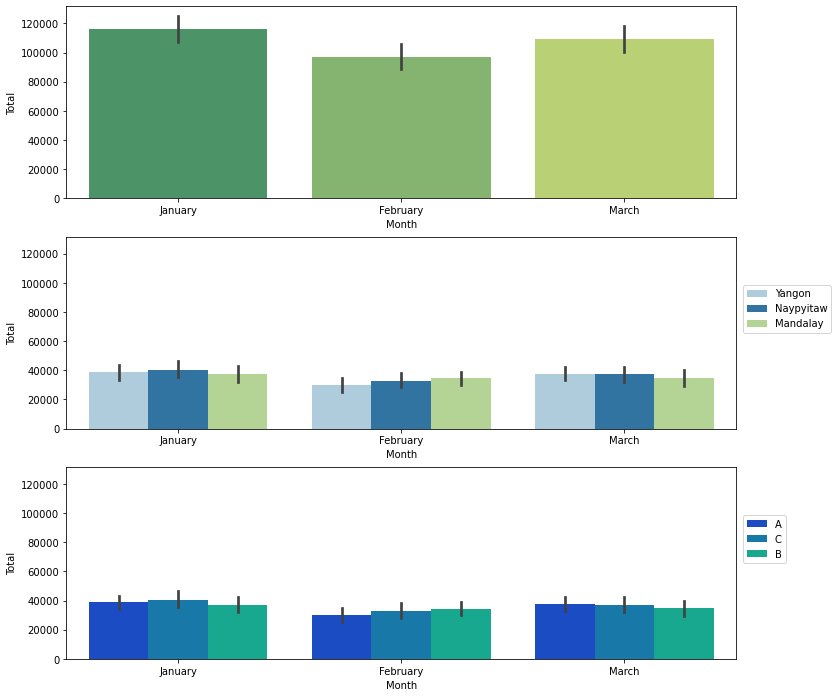

In [31]:
fig,axes=plt.subplots(nrows=3,ncols=1,figsize=(12,12),sharey=True)
sns.barplot(data=df,x="Month",y="Total",hue="City",palette="Paired",estimator=np.sum,order=["January","February","March"],ax=axes[1])
sns.barplot(data=df,x="Month",y="Total",palette="summer",estimator=np.sum,order=["January","February","March"],ax=axes[0])
sns.barplot(data=df,x="Month",y="Total",hue="Branch", palette='winter',estimator=np.sum,order=["January","February","March"],ax=axes[2])
axes[1].legend(loc=(1.01,0.5))
axes[2].legend(loc=(1.01,0.5))



C:\Users\nevta\AppData\Local\Temp\ipykernel_10324\3809813168.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(("","January","","","","February","","","","March"))
C:\Users\nevta\AppData\Local\Temp\ipykernel_10324\3809813168.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(("","January","","","","February","","","","March"))


[Text(0.75, 0, ''),
 Text(1.0, 0, 'January'),
 Text(1.25, 0, ''),
 Text(1.5, 0, ''),
 Text(1.75, 0, ''),
 Text(2.0, 0, 'February'),
 Text(2.25, 0, ''),
 Text(2.5, 0, ''),
 Text(2.75, 0, ''),
 Text(3.0, 0, 'March'),
 Text(3.25, 0, '')]

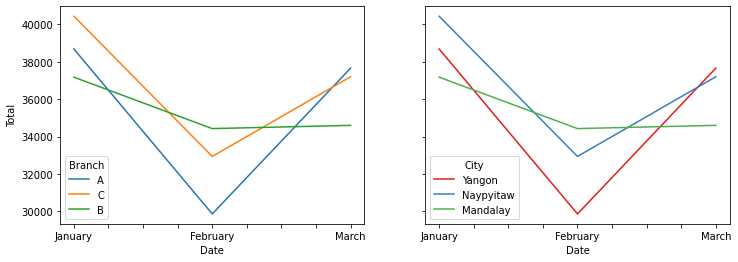

In [32]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,4),sharey=True)
sns.lineplot(data=df,x=df["Date"].dt.month,y="Total",hue="Branch",ax=axes[0],estimator=np.sum,ci=None)
sns.lineplot(data=df,x=df["Date"].dt.month,y="Total",hue="City",palette="Set1",ax=axes[1],estimator=np.sum,ci=None)
axes[0].set_xticklabels(("","January","","","","February","","","","March"))
axes[1].set_xticklabels(("","January","","","","February","","","","March"))

"Total" decreases in February, but it reaches almost the same total in March. Location and branch, on the other hand, indicates differences along months. Furthermore, "A" branch and "Mandalay move independetly as compared to other two variables.

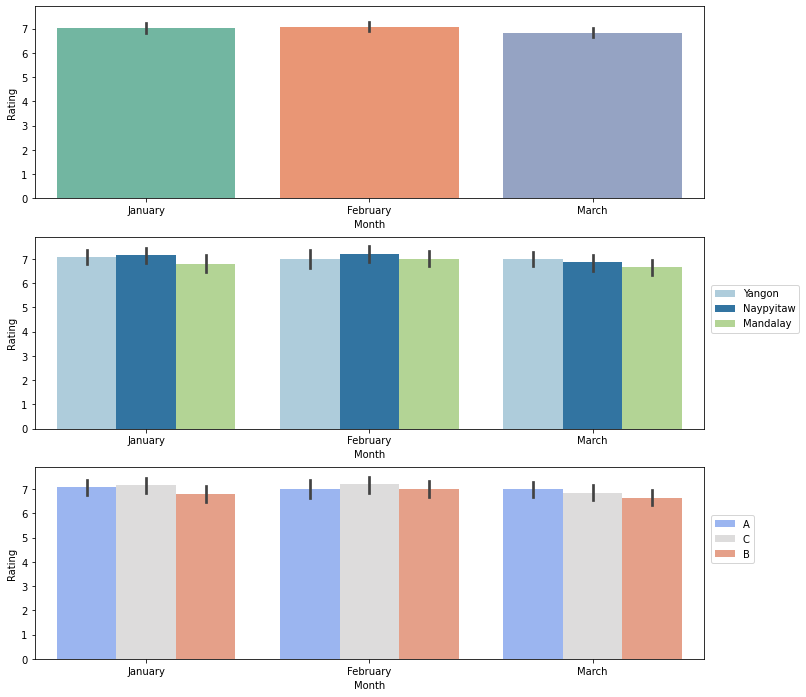

In [33]:
fig,axes=plt.subplots(nrows=3,ncols=1,figsize=(12,12),sharey=True)
sns.barplot(data=df,x="Month",y="Rating",hue="City",palette="Paired",order=["January","February","March"],ax=axes[1])
sns.barplot(data=df,x="Month",y="Rating",palette="Set2",order=["January","February","March"],ax=axes[0])
sns.barplot(data=df,x="Month",y="Rating",hue="Branch", palette="coolwarm",order=["January","February","March"],ax=axes[2])
axes[1].legend(loc=(1.01,0.5))
axes[2].legend(loc=(1.01,0.5))

C:\Users\nevta\AppData\Local\Temp\ipykernel_10324\2685718390.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(("","January","","","","February","","","","March"))
C:\Users\nevta\AppData\Local\Temp\ipykernel_10324\2685718390.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(("","January","","","","February","","","","March"))


[Text(0.75, 0, ''),
 Text(1.0, 0, 'January'),
 Text(1.25, 0, ''),
 Text(1.5, 0, ''),
 Text(1.75, 0, ''),
 Text(2.0, 0, 'February'),
 Text(2.25, 0, ''),
 Text(2.5, 0, ''),
 Text(2.75, 0, ''),
 Text(3.0, 0, 'March'),
 Text(3.25, 0, '')]

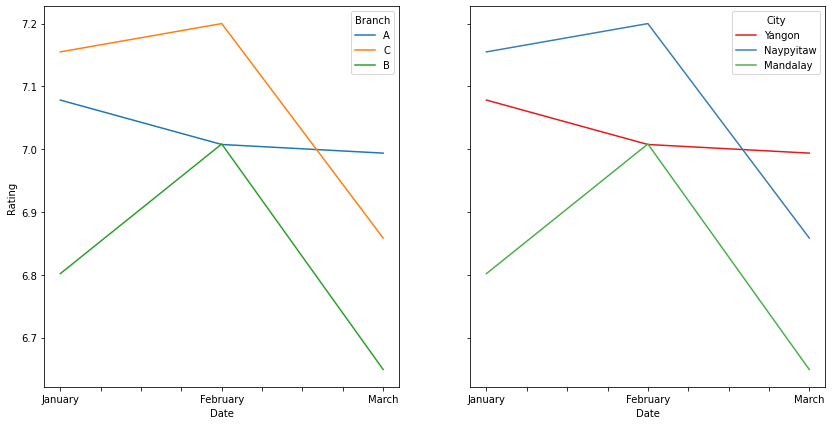

In [34]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(14,7),sharey=True)
sns.lineplot(data=df,x=df["Date"].dt.month,y="Rating",hue="Branch",ax=axes[0],ci=None)
sns.lineplot(data=df,x=df["Date"].dt.month,y="Rating",hue="City",palette="Set1",ax=axes[1],ci=None)
axes[0].set_xticklabels(("","January","","","","February","","","","March"))
axes[1].set_xticklabels(("","January","","","","February","","","","March"))


Although bar graph does not indicate differences between variables, lineplot indicates why "B" and "Mandalay" move differently in total sales. Furthermore, every branch corresponds the onother different city, so every graph indicates same pattern in these two variables.
In other words, "B" and "Mandalay" variables rise in February in terms of the ratings. Hence, this may lead us to observe another variable whether there is a relationship between "total" and "rating". 


!!Branch and city have same pattern because every branch is unique for its city.

<AxesSubplot:xlabel='Rating', ylabel='Total'>

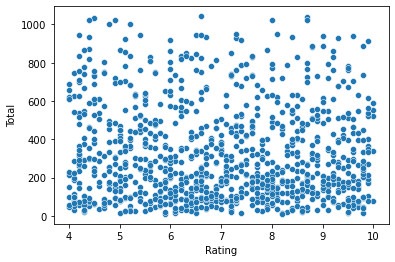

In [35]:
sns.scatterplot(data=df, x="Rating",y="Total")

In [36]:
df.corr()[["Rating"]]

,Rating
Unit price,-0.008778
Quantity,-0.015815
Tax 5%,-0.036442
Total,-0.036442
cogs,-0.036442
gross margin percentage,NaN
gross income,-0.036442
Rating,1.000000
Day_Number,-0.013879


There is a  low negative correlation between ratings and total, but whether this is a statistical essential correlation  or not .

In [37]:
import scipy.stats

In [38]:
#N0=There is no correlation between rating  and total variables.

scipy.stats.pearsonr(df["Rating"],df["Total"])
#we fail to reject null hypothesis. Hence, there is no correlation.

(-0.036441704997018334, 0.24959690975440144)

Therefore, we can argue that people's rating does not change according to their total price. Nevertheless, sharper increasement in rating for "B" and "Mandalay" may be caused  by former month price.

C:\Users\nevta\AppData\Local\Temp\ipykernel_10324\2658259745.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(("","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"))
C:\Users\nevta\AppData\Local\Temp\ipykernel_10324\2658259745.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(("","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"))


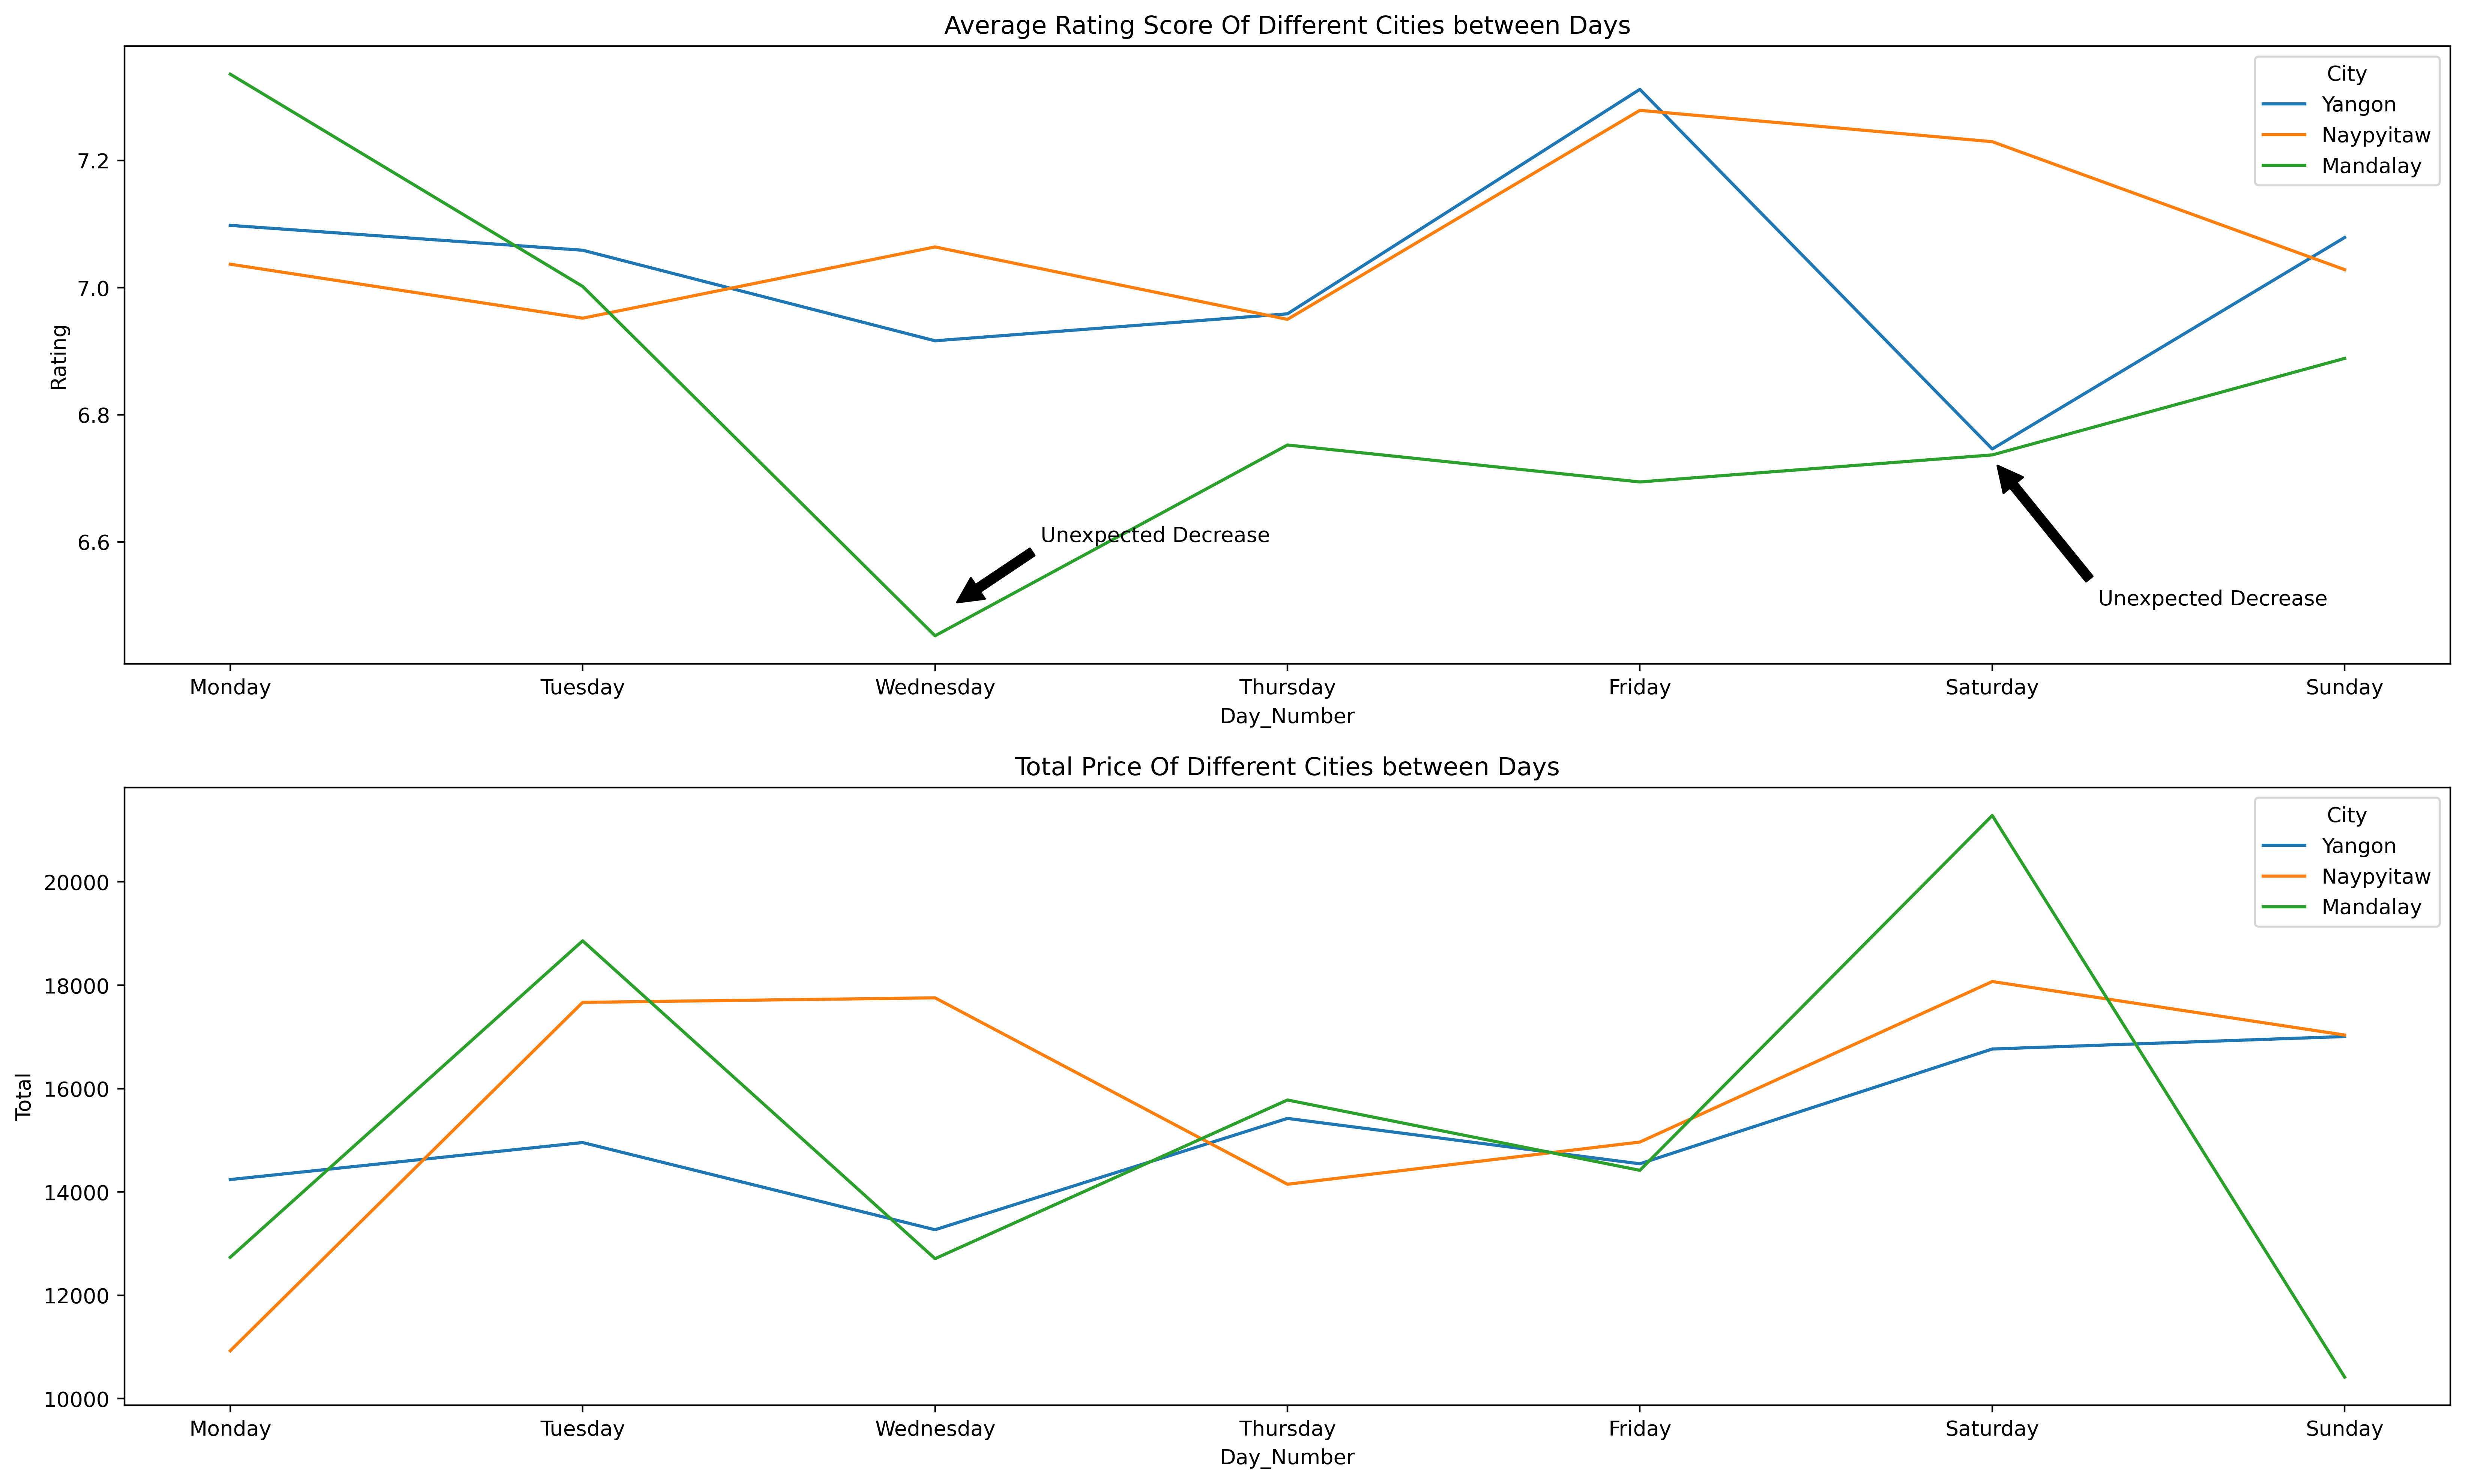

In [64]:
fig,axes=plt.subplots(nrows=2,figsize=(20,12),dpi=400)

sns.lineplot(data=df,x="Day_Number", y="Rating",hue="City",ax=axes[0],estimator=np.mean,legend=(1.01,0.5),ci=None)
sns.lineplot(data=df,x="Day_Number", y="Total",hue="City",ax=axes[1],estimator=np.sum,legend=(1.01,0.5),ci=None)

axes[0].set_title("Average Rating Score Of Different Cities between Days")
axes[1].set_title("Total Price Of Different Cities between Days")
axes[0].annotate("Unexpected Decrease",xy=(3.05,6.5),xytext=(3.3,6.6),arrowprops=dict(facecolor='black', shrink=0.05))
axes[0].annotate("Unexpected Decrease",xy=(6,6.73),xytext=(6.3,6.5),arrowprops=dict(facecolor='black', shrink=0.05))
axes[0].set_xticklabels(("","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"))
axes[1].set_xticklabels(("","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"))



While the first line graph indicates average rating score of different cities according to days, the second line graph indicates total sum score of different city according to days. In the first graph, Yangon and Naypyitaw cities have almost similar pattern except Saturday, and average rating on Saturday for Yangon decreases sharply, while total sum increases. Plus, there is similar decrease on Wendesday for Mandalay. On the other hand, Naypitaw have more stabil in terms of the rates as compared to other cities. Hence, these distinctive days have to be observed to find out the reason of decrease.  

The second graph indicates that most sales are being made in weekend. Yangon and Mandakay have similar pattern between Wednesday and Friday. Then, Mandalay makes higher sale than Yangon. Mandalay makes smallest total score on Wednesday which is a similar with its ratings. Also, although Yangon makes one of the highest sale on Saturday, Saturday is the one which have lowest average rating. Hence, the problem may be related to insufficient employee which takes care of customers.

Three cities make higher sales on weekend, but customer satisfaction does not follow similar pattern.

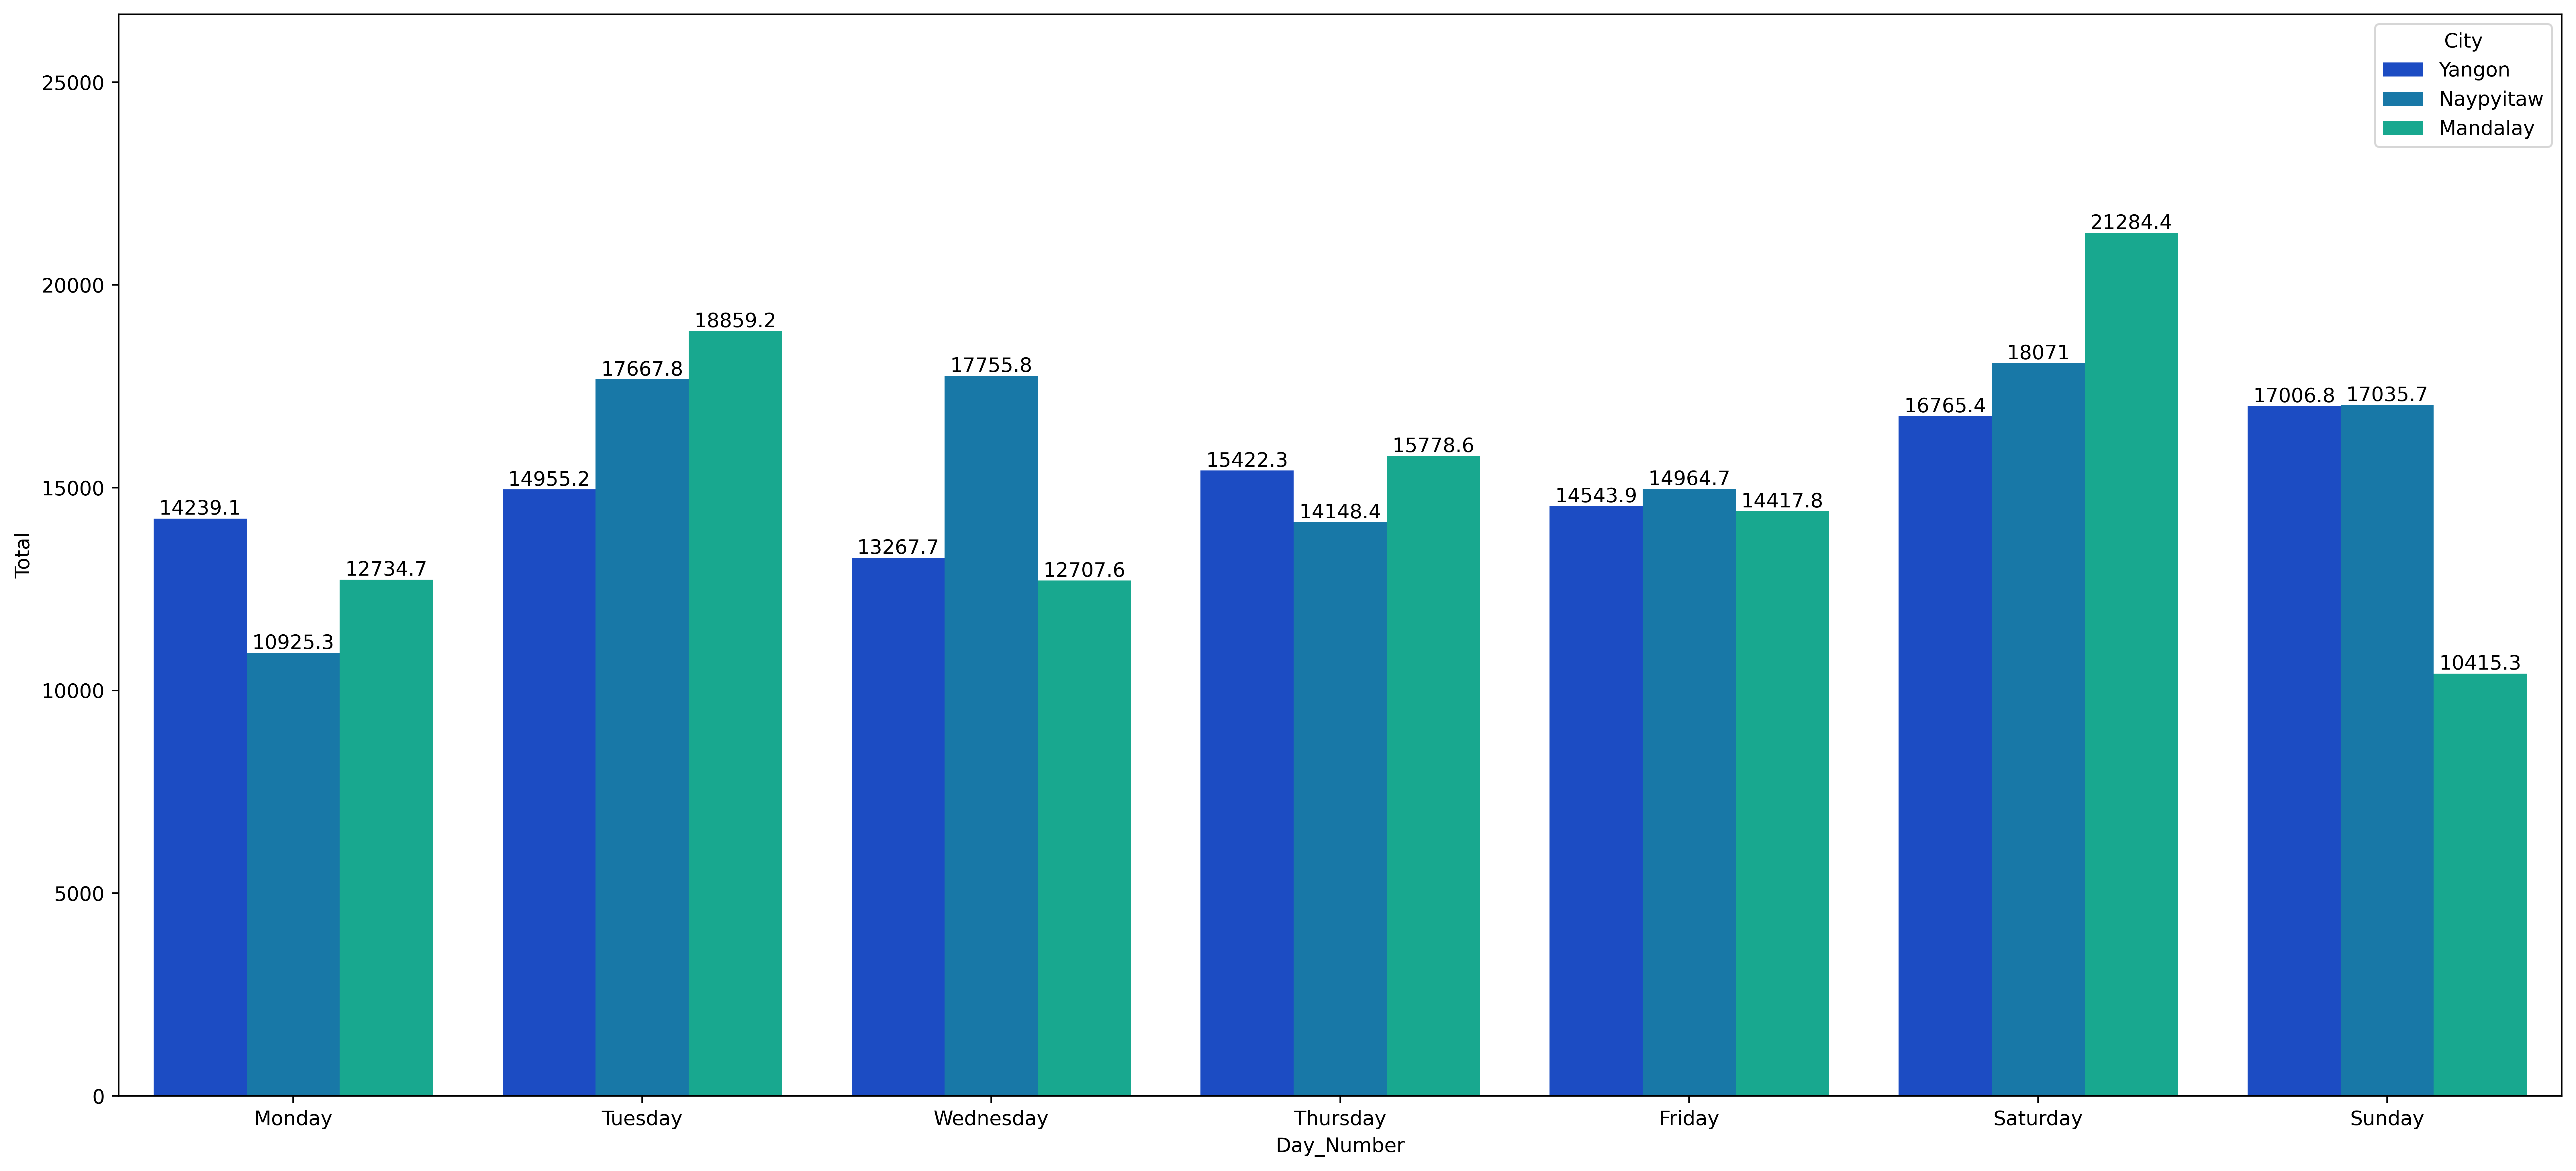

In [62]:
plt.figure(figsize=(22,10),dpi=500)
axes=sns.barplot(data=df,x="Day_Number", palette='winter',errwidth=(0.0), y="Total",hue="City",estimator=np.sum)


for i in axes.containers:
    axes.bar_label(i,)
axes.set_xticklabels(("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"))
plt.savefig(r"C:\Users\nevta\Desktop\Datasets\save2_as_a_pdf.pdf")

Saturday is the day when the most total sales are being made for Mandalay and Naypitaw,while Sunday is the day when the most total sales are being made for Yangon.

Now, lets look at the products and gender variables.

In [41]:
df[["Quantity"]].groupby(df["Gender"]).sum()

,Quantity
Gender,
Female,2869
Male,2641


Two gender have bought close amount of product.

[Text(0, 0, 'Health and beauty'),
 Text(1, 0, 'Electronic accessories'),
 Text(2, 0, 'Home and lifestyle'),
 Text(3, 0, 'Sports and travel'),
 Text(4, 0, 'Food and beverages'),
 Text(5, 0, 'Fashion accessories')]

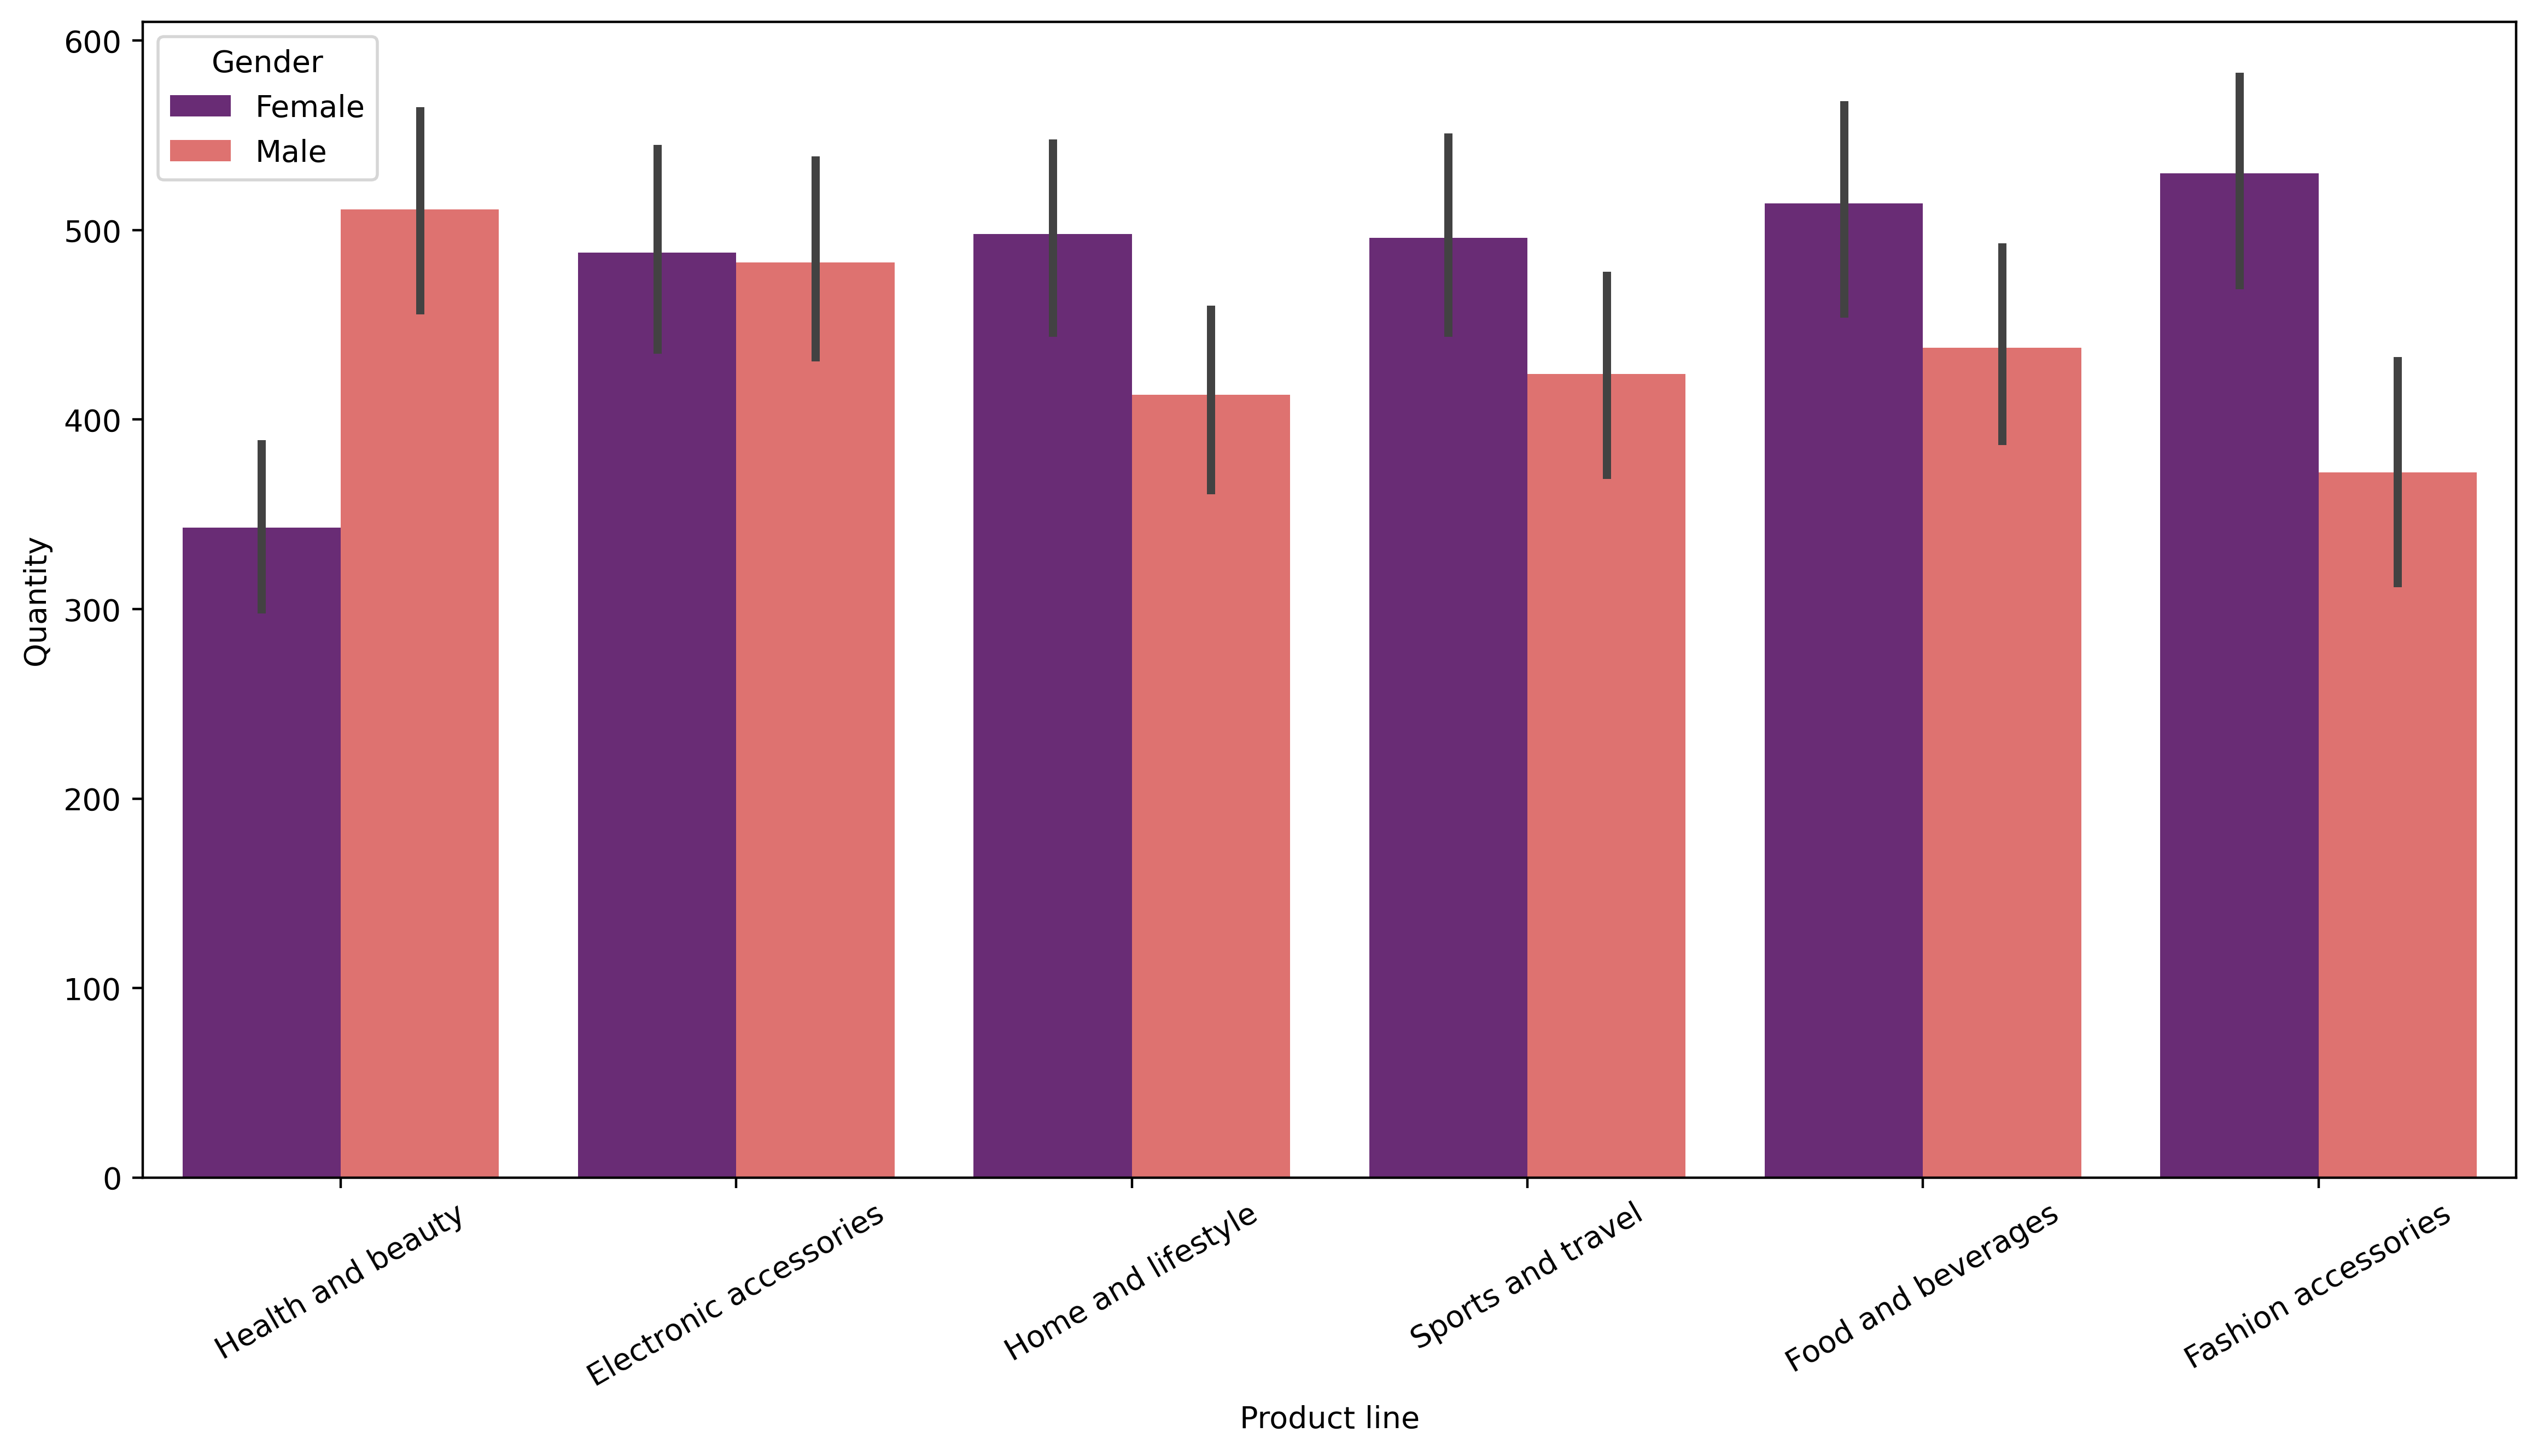

In [42]:
plt.figure(figsize=(14,7),dpi=400)
ax=sns.barplot(data=df,hue="Gender",x="Product line", y="Quantity",palette='magma',estimator=np.sum)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


Female generally have bought more products except health and beauty and electronic accessories. Although, the number of in electoronic accessories products that were sold between gender  have almost same number, there are so much differences in health and beauty. What about total prices?

<AxesSubplot:xlabel='Product line', ylabel='Total'>

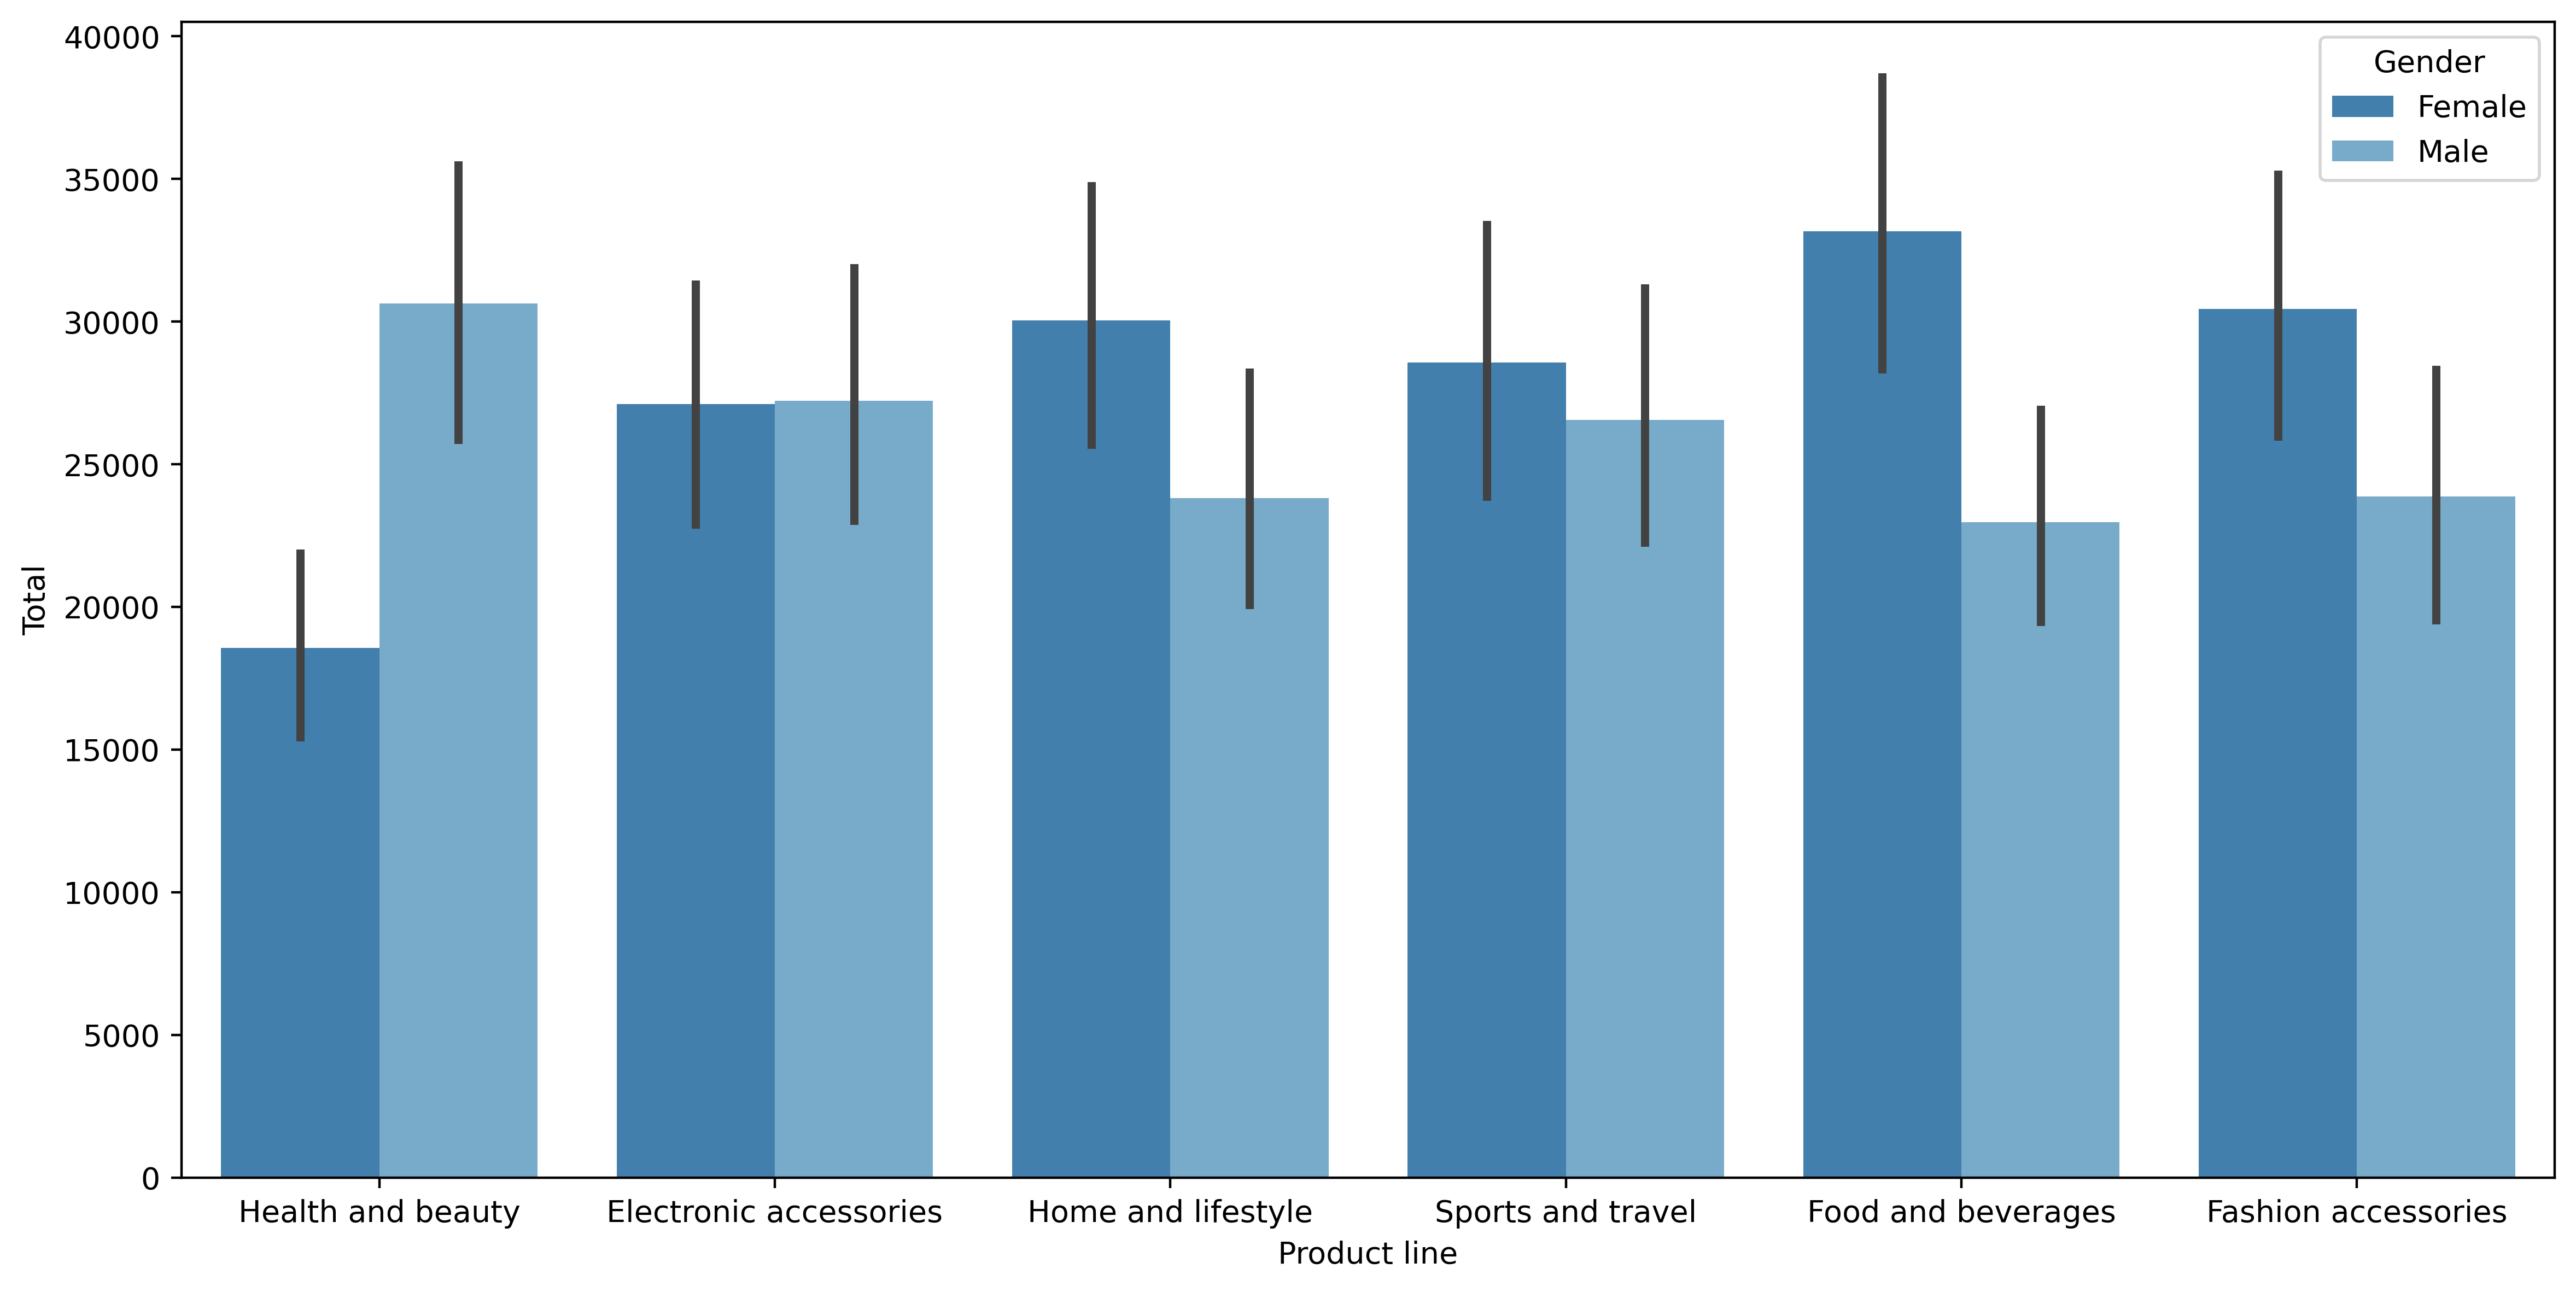

In [43]:
plt.figure(figsize=(14,7),dpi=400)
sns.barplot(data=df,hue="Gender",x="Product line", y="Total",palette='tab20c',estimator=np.sum)

The total price have similar pattern with quantity, but sum of the total price that has been sold in electronic accessories are higher in male. 

In [44]:
df[["Total"]].groupby(df["Gender"]).sum()

,Total
Gender,
Female,167882.925
Male,155083.824


It is similar with quantity.


In [45]:
filterpfe=df[df["Product line"].isin(["Health and beauty","Fashion accessories","Electronic accessories"])]
filtershh=df[df["Product line"].isin(["Sports and travel","Home and lifestyle","Food and beverages"])]



C:\Users\nevta\AppData\Local\Temp\ipykernel_10324\3856244616.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(labels=("","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"))
C:\Users\nevta\AppData\Local\Temp\ipykernel_10324\3856244616.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(labels=("","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"))


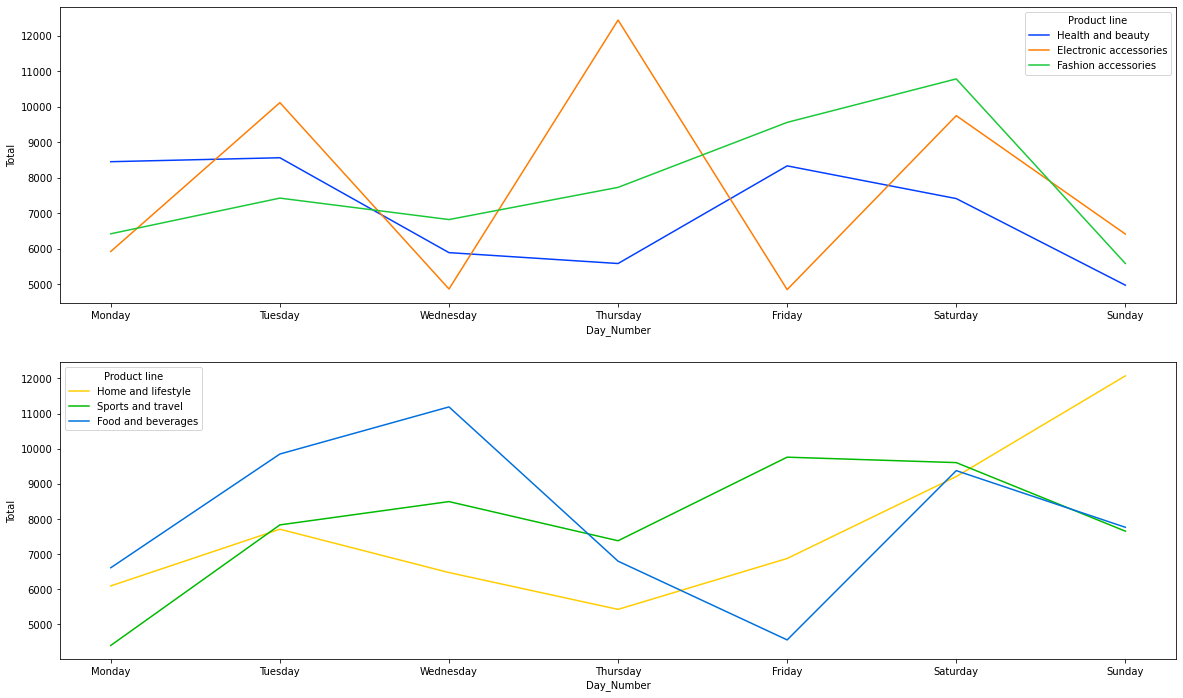

<Figure size 432x288 with 0 Axes>

In [63]:
fig,axes=plt.subplots(nrows=2,figsize=(20,12))
sns.lineplot(data=filterpfe,hue="Product line",x="Day_Number", y="Total",palette="bright",estimator=np.sum , ci=None,ax=axes[0])
sns.lineplot(data=filtershh,hue="Product line",x="Day_Number", y="Total",palette='nipy_spectral_r',estimator=np.sum, ci=None,ax=axes[1])
axes[0].set_xticklabels(labels=("","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"))
axes[1].set_xticklabels(labels=("","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"))
plt.show()
plt.savefig(r"C:\Users\nevta\Desktop\Datasets\save1_as_a_pdf.pdf")

I have separated three parts to observe easily. In this respect, the first line graph indicates that the supermarket earns much more money on Saturday from Fashion accessory products, while It earns much more from Electronic accessories on Thursday and Health and beauty on Monday.

The second line graph indicates that supermarket earns much more money on Friday from sports and travel products, while it earns much more money on sunday from Home and lifestyle and on Wednesday from food and beverage product.

Hence, these days can be used for marketing. However, these are comprehensive values. If companies want to get specific market in different cities, data can be filtered. As an example:

In [47]:
filterpfe1=filterpfe[filterpfe["City"].isin(["Mandalay"])]
filtershh1=filtershh[filtershh["City"].isin(["Mandalay"])]



C:\Users\nevta\AppData\Local\Temp\ipykernel_10324\3807623093.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(("","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"))
C:\Users\nevta\AppData\Local\Temp\ipykernel_10324\3807623093.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(("","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"))


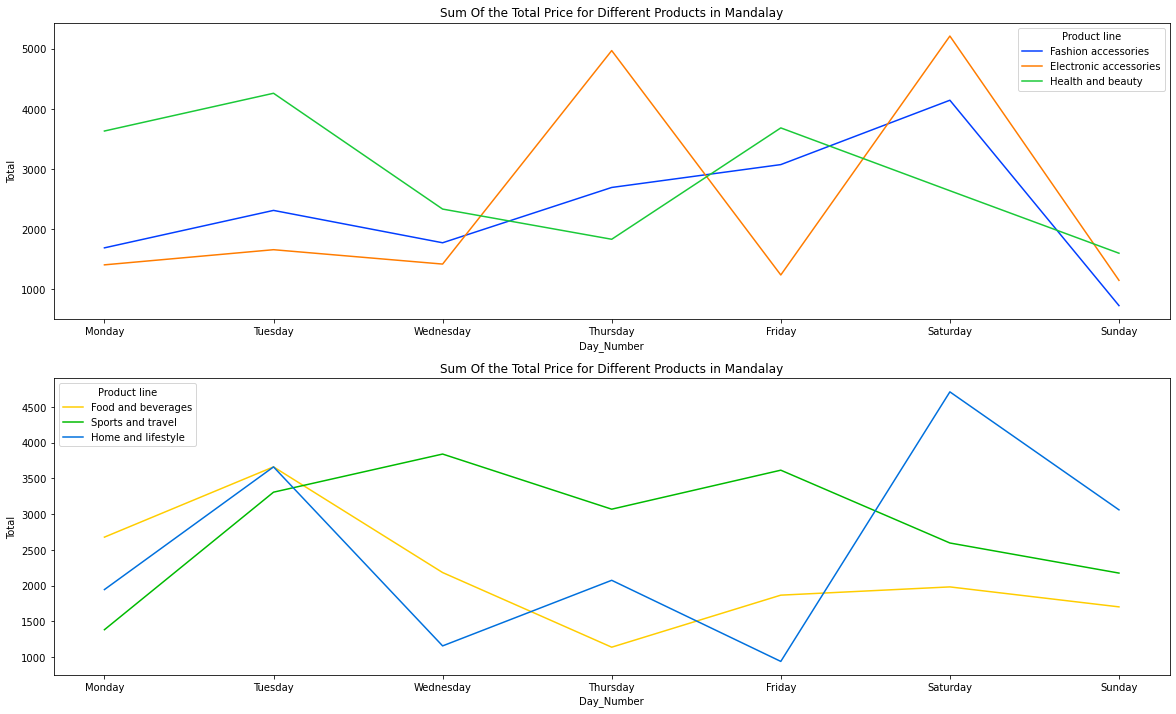

In [48]:
fig,axes=plt.subplots(nrows=2,figsize=(20,12))
sns.lineplot(data=filterpfe1,hue="Product line",x="Day_Number", y="Total",palette="bright",estimator=np.sum , ci=None,ax=axes[0])
sns.lineplot(data=filtershh1,hue="Product line",x="Day_Number", y="Total",palette='nipy_spectral_r',estimator=np.sum, ci=None,ax=axes[1])
axes[0].set_xticklabels(("","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"))
axes[1].set_xticklabels(("","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"))
axes[0].set_title("Sum Of the Total Price for Different Products in Mandalay")
axes[1].set_title("Sum Of the Total Price for Different Products in Mandalay")
plt.show()



This is an example for the specific city.For instance, Thursday and Saturday are two days to make adversitising works for electronic and accessories.

In [49]:
table=df[["Quantity","Unit price","Total","Rating","cogs"]].groupby(df["Customer type"]).mean()
table

,Quantity,Unit price,Total,Rating,cogs
Customer type,,,,,
Member,5.558882,56.206986,327.791305,6.940319,312.182196
Normal,5.460922,55.135130,318.122856,7.005210,302.974148


They are seen similar, but whether there is statistical differences?

In [50]:
#h0=There is no differences between member and normal for customer types.

scipy.stats.chi2_contingency(table)

(0.00832932352607475,
 0.9999913518365017,
 4,
 array([[  5.58868937,  56.46711114, 327.57511658,   7.07247003,
         311.9763015 ],
        [  5.43111471,  54.87500515, 318.33904452,   6.87305976,
         303.1800424 ]]))

We fail to reject null hypothesis.

In [52]:
df.to_csv(r"C:\Users\nevta\Desktop\Datasets\last_draft.csv")